## 0. Introduction

As a Python-focused developer starting a career in Switzerland with roughly 2 years of experience (through school & internships), I would like to use the StackOverflow dataset to answer some questions of personal interests.

### This analysis aims to answer the following questions:
- Career in Switzerland:
    - **1. Language**: Is Python a good language to start with as a developer? Answer in terms of Employment, Job Satisfaction, Career Satisfaction and Salary. How does it compare to other popular languages (Javascript, HTML/CSS, SQL, Java)?
    - **2. Growth**: How do Career Satisfaction and Salary grow with experience? Python vs. General?
- Career in Switzerland vs. in Germany, UK, US: 
    - **3. Country**: How do Job Satisfaction and Salary of python developers in Switzerland compare to those in Germany, UK, US?


In [833]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams.update({'font.size': 14})

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


## 1. Gather:
Here I gather the data that would be used to answer the questions above. 

**df_s:** For questions 1 & 2, I prepare a dataframe of answers from participants in switzerland, and narrow the colums down to Employment, Job Satisfaction, Career Satisfaction, Languages worked with, Experience & Salary.

**df_q3:** For questions 3, I prepare a dataframe of answers from participants in Switzerland, Germany, UK and US, and narrow the columns down to Employment, Country, Career Satisfaction, Experience, Languages worked with & Salary.

In [834]:
df_s = df[df['Country'] == 'Switzerland'][['Employment','JobSat','CareerSat', 'YearsCodePro','LanguageWorkedWith','ConvertedComp','CompTotal','CompFreq','CurrencySymbol']]
df_s.head()

,Employment,JobSat,CareerSat,YearsCodePro,LanguageWorkedWith,ConvertedComp,CompTotal,CompFreq,CurrencySymbol
29,Employed full-time,Slightly dissatisfied,Slightly dissatisfied,3,NaN,90417.0,90000.0,Yearly,CHF
68,Employed full-time,Slightly satisfied,Neither satisfied nor dissatisfied,2,C#;HTML/CSS;Java;JavaScript;Objective-C;SQL;Ty...,19284.0,1600.0,Monthly,CHF
422,Employed full-time,Very dissatisfied,Very satisfied,4,C;C++,96445.0,96000.0,Yearly,CHF
442,Employed full-time,Very satisfied,Very satisfied,8,Bash/Shell/PowerShell;C;C++;HTML/CSS;Python,80371.0,80000.0,Yearly,CHF
446,Employed full-time,Very satisfied,Very satisfied,12,Bash/Shell/PowerShell;Java;SQL;Other(s):,NaN,NaN,Yearly,CHF


In [835]:
df_q3 = df[df['Country'].isin(['Switzerland','Germany','United States','United Kingdom'])][['Employment','Country','JobSat','YearsCodePro','LanguageWorkedWith','ConvertedComp','CompTotal','CompFreq','CurrencySymbol']]
df_q3.head()

,Employment,Country,JobSat,YearsCodePro,LanguageWorkedWith,ConvertedComp,CompTotal,CompFreq,CurrencySymbol
0,"Not employed, and not looking for work",United Kingdom,NaN,NaN,HTML/CSS;Java;JavaScript;Python,NaN,NaN,NaN,NaN
3,Employed full-time,United States,Slightly satisfied,Less than 1 year,C;C++;C#;Python;SQL,61000.0,61000.0,Yearly,USD
12,Employed full-time,United States,Very satisfied,8,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,90000.0,90000.0,Yearly,USD
13,Employed full-time,Germany,Very satisfied,2,C++,57060.0,4150.0,Monthly,EUR
15,Employed full-time,United Kingdom,Slightly satisfied,3,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;T...,455352.0,29000.0,Monthly,GBP


## 2. Assess
First I look at the amount of null values in the dataset to decide on a strategy accordingly. 

In [836]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 29 to 88865
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employment          962 non-null    object 
 1   JobSat              811 non-null    object 
 2   CareerSat           817 non-null    object 
 3   YearsCodePro        843 non-null    object 
 4   LanguageWorkedWith  972 non-null    object 
 5   ConvertedComp       672 non-null    float64
 6   CompTotal           672 non-null    float64
 7   CompFreq            731 non-null    object 
 8   CurrencySymbol      811 non-null    object 
dtypes: float64(2), object(7)
memory usage: 76.4+ KB


In [837]:
df_q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33530 entries, 0 to 88877
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employment          33014 non-null  object 
 1   Country             33530 non-null  object 
 2   JobSat              28008 non-null  object 
 3   YearsCodePro        29197 non-null  object 
 4   LanguageWorkedWith  33262 non-null  object 
 5   ConvertedComp       23465 non-null  float64
 6   CompTotal           23517 non-null  float64
 7   CompFreq            25104 non-null  object 
 8   CurrencySymbol      28100 non-null  object 
dtypes: float64(2), object(7)
memory usage: 2.6+ MB


For ConvertedComp (converted annual income in USD), in theory I could fill some of theses missing values by calculating the annual income in USD from their responses in local currency. However, we see that CompTotal and ConvertedComp has the same or similar amount of non-null values, meaning people who filled out their salary in local currency tend to be nice enough to also give a converted annual income in USD. A function calculating the ConvertedComp from other salary parameters will yield 52 new rows at best, therefore, for later analysis related to salary, I will simply drop rows with null ConvertedComp values.
 
Next, I look at the categorical values in the dataset to devise a strategy accordingly.

In [838]:
df_s['CareerSat'].value_counts()

Very satisfied                        345
Slightly satisfied                    299
Slightly dissatisfied                  74
Neither satisfied nor dissatisfied     67
Very dissatisfied                      32
Name: CareerSat, dtype: int64

In [839]:
df_s['JobSat'].value_counts()

Very satisfied                        290
Slightly satisfied                    259
Slightly dissatisfied                 119
Neither satisfied nor dissatisfied     85
Very dissatisfied                      58
Name: JobSat, dtype: int64

For the two satisfaction columns, I will put them into a scale from -1 to 1 in the next section, so that I can come up with average values for different groups of people.

In [840]:
df_s['Employment'].value_counts()

Employed full-time                                      682
Employed part-time                                      157
Independent contractor, freelancer, or self-employed     59
Not employed, and not looking for work                   43
Not employed, but looking for work                       15
Retired                                                   6
Name: Employment, dtype: int64

For the analysis, I would like to come up with a precentage of developers employed in any form. So, I will create an extra column, which uses a 1 to represent "Employed full-time", "Employed part-time" and "Independent contractor, freelancer, or self-employed" and 0 for the rest.

In [841]:
df_q3['YearsCodePro'].value_counts()

3                     2663
2                     2565
5                     2345
4                     2244
10                    1826
6                     1727
7                     1428
8                     1364
1                     1359
Less than 1 year      1279
20                    1083
12                     952
15                     946
9                      778
11                     725
13                     587
18                     551
14                     536
25                     381
16                     374
19                     370
22                     351
30                     319
17                     304
21                     284
23                     242
24                     175
35                     154
26                     130
28                     127
27                     126
32                     116
33                      96
40                      84
29                      83
34                      79
31                      73
3

We see two strings among the answers. As I would like to use this column as qualitative data, I will replace "Less than 1 year" with 0, and simply remove the rows with 'More than 50 year' given the low proportion.

Lastly, I will create a new column to indicate if the developer lists Python in the languages he/she has extensive experience in, since this analysis has a Python focus.

## 3. Clean

For both datasets I will: 
- change CareerSat to -1 to 1 values
- drop columns: "CompTotal","CompFreq","CurrencySymbol"

For **df_s** I will also: 
- change JobSat to -1 to 1 values
- create new column "Employed"
- create new column "Python"

For **df_q3** I will also: 
- only keep rows where "LanguageWorkedWith" contains "Python"
- only keep rows where "Employment" == "Employed full-time"

In [842]:
Sat_dic = {"Very satisfied" : 1,
           "Slightly satisfied" : 0.5,
           "Neither satisfied nor dissatisfied": 0,
           "Slightly dissatisfied": -0.5,
           "Very dissatisfied": -1}

Emp_dic = {"Employed full-time" : 1,
           "Employed part-time" : 1,
           "Independent contractor, freelancer, or self-employed" : 1,
           "Not employed, and not looking for work" : 0,
           "Not employed, but looking for work" : 0,
           "Retired" : 0}

def common_clean(df):
    df = df.replace({"JobSat": Sat_dic})
    df = df.drop(columns=['CompTotal','CompFreq','CurrencySymbol'])

    return df

df_s = common_clean(df_s)
df_s = df_s.replace({"CareerSat": Sat_dic})
df_s['Employed'] = df_s['Employment'].map(Emp_dic)
df_s['Python'] = df_s['LanguageWorkedWith'].str.contains('Python')
df_s.head()

,Employment,JobSat,CareerSat,YearsCodePro,LanguageWorkedWith,ConvertedComp,Employed,Python
29,Employed full-time,-0.5,-0.5,3,NaN,90417.0,1.0,NaN
68,Employed full-time,0.5,0.0,2,C#;HTML/CSS;Java;JavaScript;Objective-C;SQL;Ty...,19284.0,1.0,False
422,Employed full-time,-1.0,1.0,4,C;C++,96445.0,1.0,False
442,Employed full-time,1.0,1.0,8,Bash/Shell/PowerShell;C;C++;HTML/CSS;Python,80371.0,1.0,True
446,Employed full-time,1.0,1.0,12,Bash/Shell/PowerShell;Java;SQL;Other(s):,NaN,1.0,False


In [843]:
df_q3 = common_clean(df_q3)
df_q3 = df_q3[df_q3['Employment'] == "Employed full-time"]

def select_lan(df,string):
    return df[df['LanguageWorkedWith'].str.contains(string)]

df_q3 = select_lan(df_q3.dropna(subset=['LanguageWorkedWith']),'Python')
df_q3.sample(5)

,Employment,Country,JobSat,YearsCodePro,LanguageWorkedWith,ConvertedComp
18412,Employed full-time,Germany,0.5,1,C#;Java;JavaScript;Python;TypeScript,10308.0
80927,Employed full-time,United States,1.0,15,Bash/Shell/PowerShell;Python;VBA,100000.0
73348,Employed full-time,United States,0.5,18,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,NaN
48770,Employed full-time,United States,0.5,Less than 1 year,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,NaN
29869,Employed full-time,Germany,-0.5,12,C++;Elixir;Go;JavaScript;Python;Rust,74474.0


## 4. Analyze,  Model, and Visualize

#### 4.1.1  Is Python a good language to start with as a developer? Answer in terms of Employment, Job Satisfaction, Career Satisfaction and Salary.

In [844]:
df_s[df_s['Python'] == True].describe()

,JobSat,CareerSat,ConvertedComp,Employed
count,385.000000,387.000000,3.180000e+02,452.000000
mean,0.364935,0.527132,1.682545e+05,0.920354
std,0.654465,0.552819,2.587817e+05,0.271044
min,-1.000000,-1.000000,1.850000e+02,0.000000
25%,0.000000,0.500000,6.800125e+04,1.000000
50%,0.500000,0.500000,9.092050e+04,1.000000
75%,1.000000,1.000000,1.205560e+05,1.000000
max,1.000000,1.000000,2.000000e+06,1.000000


In [845]:
df_s[df_s['Employed'] == True][df_s['Employment'] == "Employed full-time"].shape[0]/df_s[df_s['Employed'] == True].shape[0]

/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.7594654788418709

In [1004]:
df_s[df_s['Employed'] == True][df_s['Employment'] == "Employed part-time"].shape[0]/df_s[df_s['Employed'] == True].shape[0]

/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.17483296213808464

In [846]:
df_s[df_s['CareerSat'] > 0].shape[0]/df_s.shape[0]

0.6584867075664622

In [847]:
df_s[df_s['JobSat'] > 0].shape[0]/df_s.shape[0]

0.5613496932515337

In [1005]:
df_s[df_s['CareerSat'] < 0].shape[0]/df_s.shape[0]

0.1083844580777096

In [1006]:
df_s[df_s['JobSat'] < 0].shape[0]/df_s.shape[0]

0.18098159509202455

In switzerland, the eployment rate of a developer with extensive Python experience is **92%**. Out of the employed developers, **76%** percent are employed full-time.

We see that the average Job Satisfaction is **0.365**, roughly corresponding to "Slightly satisfied". The average Career Satisfaction is **0.527**, corresponding to "Slightly satisfied". **66%** of the respondants are satisfied with their career and **56%** are satiesfied with their jobs. 

We see that for the ConvertedComp the mean is higher than the 75% value, indicating that there are some bogus values around the max.

/Users/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


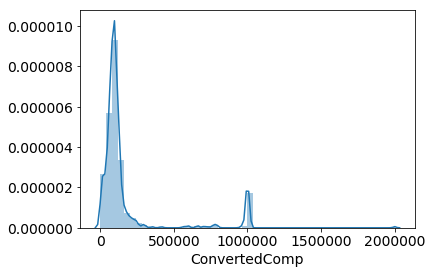

In [848]:
sns.distplot(df_s['ConvertedComp'].dropna());

I will put a cap at 500'000 for salary calculation.

In [849]:
df_s[df_s['ConvertedComp'] < 500000][df_s['Python'] == True][df_s['Employment'] == 'Employed full-time'].describe()['ConvertedComp']

/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count       219.000000
mean     100147.223744
std       51379.310678
min         185.000000
25%       72485.500000
50%       90420.000000
75%      115030.500000
max      414913.000000
Name: ConvertedComp, dtype: float64

Here, we see that the average annual salary of full-time employed developers who listed Python as a language they have extensive experiences in is around **100k USD**.

#### 4.1.2 How does it compare to other popular languages (Javascript, HTML/CSS, SQL, Java)?
To visualize this, I first create a dataframe with these columns: "Language", "MeanJobSat", "MeanCareerSat", "EmploymentRate", "MeanSalary".

In [850]:
language_list = ['JavaScript', 'HTML/CSS', 'SQL', 'Java','Python']
columns = ['MeanJobSat','MeanCareerSat','EmploymentRate','MeanSalary']

df_lan = pd.DataFrame(index = language_list, columns=columns)
#df_lan['Language'] = language_list
df_lan

,MeanJobSat,MeanCareerSat,EmploymentRate,MeanSalary
JavaScript,NaN,NaN,NaN,NaN
HTML/CSS,NaN,NaN,NaN,NaN
SQL,NaN,NaN,NaN,NaN
Java,NaN,NaN,NaN,NaN
Python,NaN,NaN,NaN,NaN


In [851]:
for index, row in df_lan.iterrows():
    df_temp = select_lan(df_s.dropna(subset=['LanguageWorkedWith']),index)
    row['MeanJobSat'] = df_temp['JobSat'].mean()
    row['MeanCareerSat'] = df_temp['CareerSat'].mean()
    row['EmploymentRate'] = df_temp['Employed'].mean()
    row['MeanSalary'] = df_temp[df_temp['ConvertedComp'] < 500000][df_s['Employment'] == 'Employed full-time']['ConvertedComp'].mean()

df_lan

/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,MeanJobSat,MeanCareerSat,EmploymentRate,MeanSalary
JavaScript,0.366928,0.52233,0.940496,90369.1
HTML/CSS,0.385859,0.53507,0.940778,91064.2
SQL,0.354651,0.534642,0.958167,93290.1
Java,0.3672,0.527027,0.933066,93587
Python,0.364935,0.527132,0.920354,100147


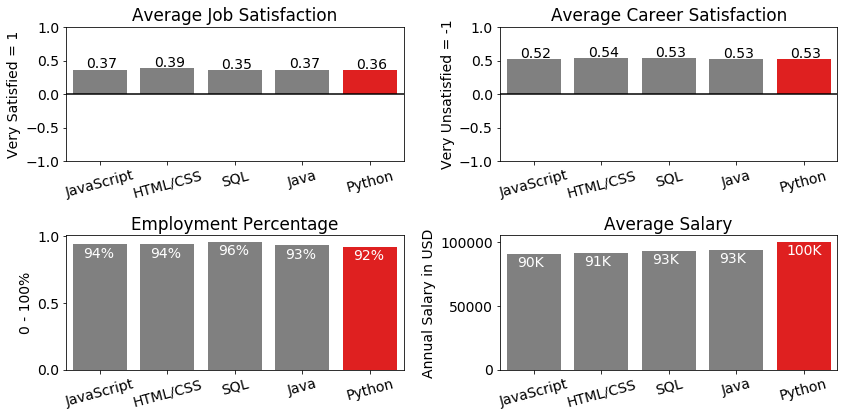

In [1013]:
clrs = ['red' if (x == 'Python') else 'grey' for x in df_lan.index.values]

f, axes = plt.subplots(2, 2, figsize=(12, 6))

chart1 = sns.barplot(df_lan.index.values, df_lan['MeanJobSat'], palette=clrs, ax=axes[0, 0])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=15);
chart1.set_ylabel('Very Satisfied = 1')
chart1.set_title('Average Job Satisfaction');
chart1.set(ylim=(-1, 1))
chart1.axhline(0, color = 'black')
for i in range(5):
    chart1.text(x = np.arange(5)[i]-0.2, y = df_lan['MeanJobSat'][i] + 0.02, s = round(df_lan['MeanJobSat'][i],2), size = 14, color = 'black')

chart2 = sns.barplot(df_lan.index.values, df_lan['MeanCareerSat'], palette=clrs, ax=axes[0, 1])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=15);
chart2.set_ylabel('Very Unsatisfied = -1')
chart2.set_title('Average Career Satisfaction');
chart2.set(ylim=(-1, 1))
chart2.axhline(0, color = 'black')
for i in range(5):
    chart2.text(x = np.arange(5)[i]-0.2, y = df_lan['MeanCareerSat'][i] + 0.02, s = round(df_lan['MeanCareerSat'][i],2), size = 14, color = 'black')


chart3 = sns.barplot(df_lan.index.values, df_lan['EmploymentRate'], palette=clrs, ax=axes[1, 0])
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=15);
chart3.set_ylabel('0 - 100%')
chart3.set_title('Employment Percentage');
for i in range(5):
    chart3.text(x = np.arange(5)[i]-0.25, y = df_lan['EmploymentRate'][i] - 0.1, s = str(int(round(df_lan['EmploymentRate'][i],2)*100)) + '%', size = 14, color = 'white')

chart4 = sns.barplot(df_lan.index.values, df_lan['MeanSalary'], palette=clrs, ax=axes[1, 1])
chart4.set_xticklabels(chart4.get_xticklabels(), rotation=15);
chart4.set_ylabel('Annual Salary in USD')
chart4.set_title('Average Salary');
for i in range(5):
    chart4.text(x = np.arange(5)[i]-0.25, y = df_lan['MeanSalary'][i] - 10000, s = str(int(round(df_lan['MeanSalary'][i],2)/1000)) + 'K', size = 14, color = 'white')

plt.tight_layout()
#plt.savefig('plot/q1_1.png', bbox_inches='tight')

We see that the job and career satisfactions are pretty similar across the board, so are the employment percentages. Developers with Python experience are, however, the highest paid group. 

#### 4.2 How do Career Satisfaction and Salary grow with experience? Python vs. General?

I create a new dataset for question 2 by:
- selecting related columns ('Employment', 'YearsCode', 'CareerSat', 'ConvertedComp', 'LanguageWorkedWith', 'Python')
- dropping rows where YearsCode are non-numeric
- dropping rows where ConvertedComp and/or YearsCode are null values
- dropping rows where ConvertedComp is higher than 500000

Additionally, for this analysis I focus on full-time employed developers.

In [853]:
df_q2 = df_s[['Employment','YearsCodePro', 'CareerSat', 'ConvertedComp', 'LanguageWorkedWith', 'Python']]

df_q2 = df_q2[~df_q2['YearsCodePro'].isin(["More than 50 years"])]
df_q2['YearsCodePro'] = df_q2['YearsCodePro'].replace({'Less than 1 year':0})
df_q2['YearsCodePro'] = df_q2["YearsCodePro"].astype('float64')

df_q2 = df_q2.dropna(subset = ['ConvertedComp','YearsCodePro'])
df_q2 = df_q2[df_q2['ConvertedComp'] < 500000]

df_q2 = df_q2[df_q2['Employment'] == "Employed full-time"]

df_q2.sample(5)

,Employment,YearsCodePro,CareerSat,ConvertedComp,LanguageWorkedWith,Python
27795,Employed full-time,5.0,1.0,115533.0,Bash/Shell/PowerShell;C;C++;Python;SQL,True
44929,Employed full-time,10.0,-0.5,81375.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,False
21927,Employed full-time,5.0,0.5,100463.0,Bash/Shell/PowerShell;Go;HTML/CSS;Java;JavaScr...,True
61060,Employed full-time,16.0,0.5,130602.0,HTML/CSS;JavaScript;Scala;SQL,False
1699,Employed full-time,5.0,0.5,88910.0,HTML/CSS;Java;JavaScript;Kotlin;PHP;Ruby,False


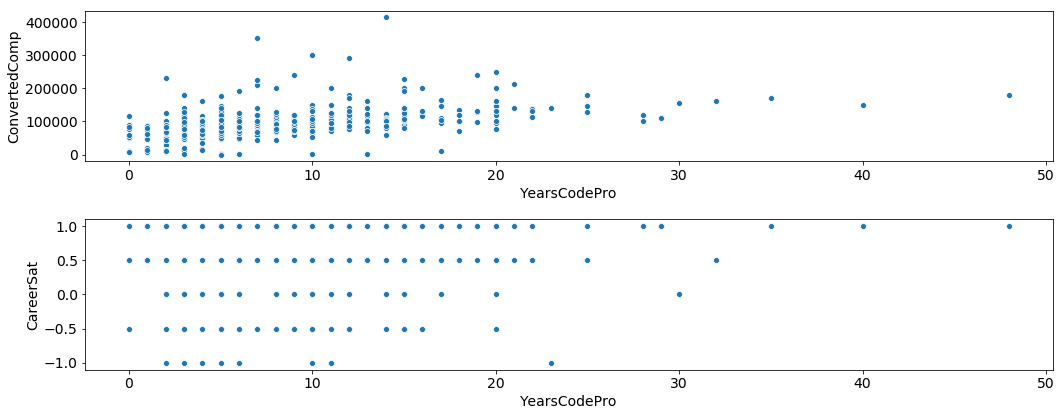

In [873]:
f, axes = plt.subplots(2, 1, figsize=(15, 6))

sns.scatterplot(x=df_q2["YearsCodePro"], y="ConvertedComp", data=df_q2, ax=axes[0])
sns.scatterplot(x=df_q2["YearsCodePro"], y="CareerSat", data=df_q2, ax=axes[1])
plt.tight_layout()

Scatterplot of Salary or Career Satisfaciton against Experience **does not** show a clear trend. Therefore I look at the average Salary and Career Satisfaction of developers plotted against experience. 

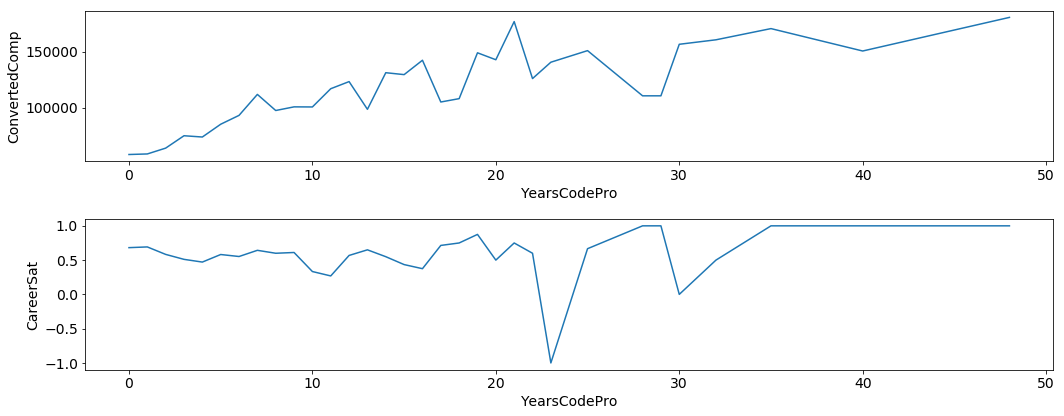

In [874]:
df_temp = df_q2.groupby('YearsCodePro').mean()

f, axes = plt.subplots(2, 1, figsize=(15, 6))
sns.lineplot(x=df_temp.index, y="ConvertedComp", data=df_temp, ax=axes[0])
sns.lineplot(x=df_temp.index, y="CareerSat", data=df_temp, ax=axes[1])
plt.tight_layout()

In [856]:
df_q2[df_q2['YearsCodePro'] < 21].shape[0]/df_q2.shape[0]

0.956140350877193

We see that after 20 years the data seem to be noisy. Since the majority (95%) of the data are from developers within 20 years of experience. We can plot again with range limited to 20 years. 

/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


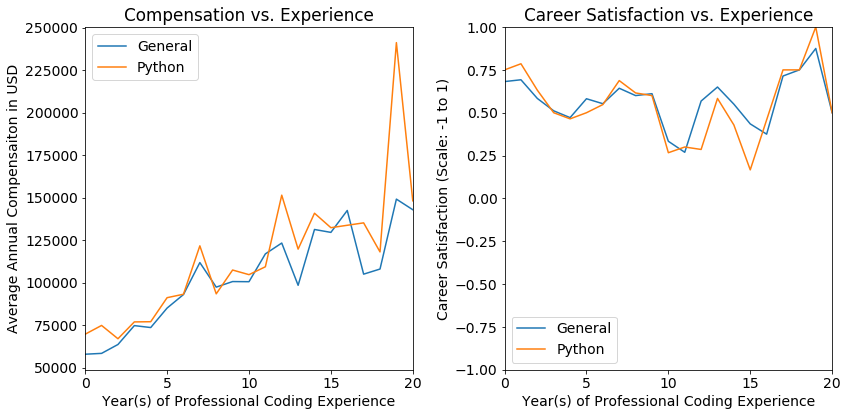

In [1012]:
df_temp = df_q2[df_q2['YearsCodePro'] < 21].groupby('YearsCodePro').mean()
df_temp2 = df_q2[df_q2['YearsCodePro'] < 21][df_q2['Python'] == True].groupby('YearsCodePro').mean()

f, axes = plt.subplots(1, 2, figsize=(12, 6));
chart1 = sns.lineplot(x=df_temp.index, y="ConvertedComp", data=df_temp, ax=axes[0]);
sns.lineplot(x=df_temp2.index, y="ConvertedComp", data=df_temp2, ax=axes[0]);
chart1.legend(['General','Python']);
chart1.set(xlim=(0,20));
chart1.set_ylabel('Average Annual Compensaiton in USD')
chart1.set_xlabel('Year(s) of Professional Coding Experience')
chart1.set_title('Compensation vs. Experience');

chart2 = sns.lineplot(x=df_temp.index, y="CareerSat", data=df_temp, ax=axes[1]);
sns.lineplot(x=df_temp2.index, y="CareerSat", data=df_temp2, ax=axes[1]);
chart2.legend(['General','Python']);
chart2.set(xlim=(0,20));
chart2.set(ylim=(-1,1));
chart2.set_ylabel('Career Satisfaction (Scale: -1 to 1)')
chart2.set_xlabel('Year(s) of Professional Coding Experience')
chart2.set_title('Career Satisfaction vs. Experience');

plt.tight_layout()
#plt.savefig('plot/q2_1.png', bbox_inches='tight')

We see here that the Career Satisfaction does not seem to have a linear relationship with the coding experience. 

We see that compensation, as expected, seems to have a linear relationship with the coding experience, i.e. the more experienced, the better paid. We can use a little bit of machine learning here and find a linear fit. Note that there is an outliner at 19 years for Python. To get a more accurate linear fit for the data before, I limit again the range, this time to 15 year, which still covers 89% of the original data.

In [858]:
df_q2[df_q2['YearsCodePro'] < 16].shape[0]/df_q2.shape[0]

0.8903508771929824

In [859]:
X = df_q2[df_q2['YearsCodePro'] < 16][['YearsCodePro']]
y = df_q2[df_q2['YearsCodePro'] < 16][['ConvertedComp']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .70)

lm_model_g = LinearRegression(normalize=True)
lm_model_g.fit(X, y)
        
y_test_preds = lm_model_g.predict(X_test)

print(lm_model_g.coef_[0])
print(lm_model_g.intercept_)
print(r2_score(y_test, y_test_preds)) 
print(mean_squared_error(y_test, y_test_preds)) 

[4860.11966971]
[59192.77915292]
0.19090387197957015
1714408728.7731612


In [860]:
X = df_q2[df_q2['YearsCodePro'] < 16][df_q2['Python'] == True][['YearsCodePro']]
y = df_q2[df_q2['YearsCodePro'] < 16][df_q2['Python'] == True][['ConvertedComp']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .70)

lm_model_p = LinearRegression(normalize=True)
lm_model_p.fit(X, y)
        
y_test_preds = lm_model_p.predict(X_test)

print(lm_model_p.coef_[0])
print(lm_model_p.intercept_)
print(r2_score(y_test, y_test_preds)) 
print(mean_squared_error(y_test, y_test_preds)) 

[5109.97524841]
[63087.5962728]
0.13694450012299164
1733184399.7840555


/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


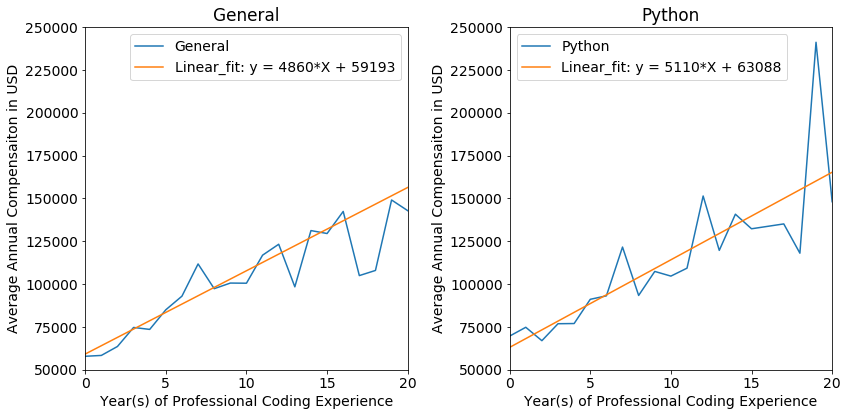

In [1011]:
f, axes = plt.subplots(1, 2, figsize=(12, 6));

chart3 = sns.lineplot(x=df_temp.index, y="ConvertedComp", data=df_temp, ax = axes[0]);
chart4 = sns.lineplot(x=df_temp2.index, y="ConvertedComp", data=df_temp2, ax = axes[1]);

x_vals = np.array(axes[0].get_xlim())
y_vals = lm_model_g.intercept_ + lm_model_g.coef_[0] * x_vals
sns.lineplot(x=x_vals, y=y_vals, ax = axes[0]);
y_vals = lm_model_p.intercept_ + lm_model_p.coef_[0] * x_vals
sns.lineplot(x=x_vals, y=y_vals, ax = axes[1]);

chart3.legend(['General', 'Linear_fit: y = 4860*X + 59193']);
chart3.set(xlim=(0,20));
chart3.set(ylim=(50000,250000));
chart3.set_ylabel('Average Annual Compensaiton in USD')
chart3.set_xlabel('Year(s) of Professional Coding Experience')
chart3.set_title('General');

chart4.legend(['Python', 'Linear_fit: y = 5110*X + 63088']);
chart4.set(xlim=(0,20));
chart4.set(ylim=(50000,250000));
chart4.set_ylabel('Average Annual Compensaiton in USD')
chart4.set_xlabel('Year(s) of Professional Coding Experience')
chart4.set_title('Python');

plt.tight_layout()
#plt.savefig('plot/q2_2.png', bbox_inches='tight')

According to the linear fits, the average starting salary of a developer is around **59000CHF** and grows **4860CHF** with each year of professional coding experience. The average starting compensation of a developer with Python experience is around **63000CHF** and grows **5110CHF** with each year of professional coding experience.

#### 4.3 How do Career Satisfaction and Salary of python developers in Switzerland compare to those in Germany, UK, US?

In [862]:
df_q3.head()

,Employment,Country,JobSat,YearsCodePro,LanguageWorkedWith,ConvertedComp
3,Employed full-time,United States,0.5,Less than 1 year,C;C++;C#;Python;SQL,61000.0
21,Employed full-time,United States,-1.0,18,Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;...,103000.0
22,Employed full-time,United States,0.5,1,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,69000.0
25,Employed full-time,United States,1.0,8,Bash/Shell/PowerShell;C++;C#;HTML/CSS;JavaScri...,114000.0
31,Employed full-time,United States,0.5,2,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,1100000.0


Here I further clean the dataset by:

"ConvertedComp":
- Removing values over 500000

"YearsCodePro":
- replacing "Less than 1 year" with 0
- removing rows with "More than 50 years"

In [863]:
df_q3 = df_q3[df_q3['ConvertedComp'] < 500000]

df_q3['YearsCodePro'] = df_q3['YearsCodePro'].replace({'Less than 1 year':0})
df_q3 = df_q3[~df_q3['YearsCodePro'].isin(["More than 50 years"])]
df_q3['YearsCodePro'] = df_q3['YearsCodePro'].astype('float64')

In [864]:
df_country = df_q3.groupby('Country').mean()
df_country

,JobSat,YearsCodePro,ConvertedComp
Country,,,
Germany,0.375986,7.538596,67021.457493
Switzerland,0.315068,7.712329,100147.223744
United Kingdom,0.401274,8.524380,82012.765924
United States,0.455488,8.668633,123010.576637


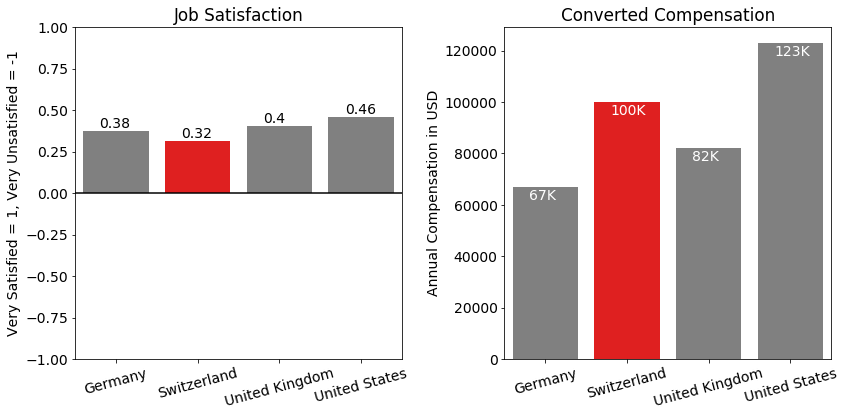

In [1009]:
clrs2 = ['red' if (x == 'Switzerland') else 'grey' for x in df_country.index.values]

f, axes = plt.subplots(1, 2, figsize=(12, 6))

chart1 = sns.barplot(df_country.index.values, df_country['JobSat'], palette=clrs2, ax=axes[0])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=15);
chart1.set_ylabel('Very Satisfied = 1, Very Unsatisfied = -1')
chart1.set_title('Job Satisfaction')
chart1.set(ylim=(-1, 1))
axes[0].axhline(0, color = 'black')
for i in range(4):
    chart1.text(x = np.arange(4)[i]-0.2, y = df_country['JobSat'][i] + 0.02, s = round(df_country['JobSat'][i],2), size = 14, color = 'black')

chart2 = sns.barplot(df_country.index.values, df_country['ConvertedComp'], palette=clrs2, ax=axes[1])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=15);
chart2.set_ylabel('Annual Compensation in USD')
chart2.set_title('Converted Compensation')
for i in range(4):
    chart2.text(x = np.arange(4)[i]-0.2, y = df_country['ConvertedComp'][i] - 5000, s = str(int(round(df_country['ConvertedComp'][i],2)/1000)) + 'K', size = 14, color = 'white')

plt.tight_layout()
#plt.savefig('plot/q3_1.png', bbox_inches='tight')

Above we see that Job Satisfaction is lowest in Switzerland comparing to other countries, whereas the average compensation is the 2nd highest, with the 1st being the United States. 

We can also break this down by years of experience into Junior (0-2 years), Mid-Level (2-4 years), Senior (4-8 years), Fellow (8+ years).

In [944]:
country_list = ['Germany','Switzerland','United States','United Kingdom']
level_list = ['Junior \n (0-2 Years)','Mid-Level \n (2-4 Years)','Senior \n (4-8 Years)','Fellow \n (8+ Years)']
comp_columns = ['Junior_Comp','Mid_Comp','Senior_Comp','Fellow_Comp']
sat_columns = ['Junior_Sat', 'Mid_Sat', 'Senior_Sat', 'Fellow_Sat']

df_comp = pd.DataFrame(index = country_list, columns=comp_columns)
df_sat = pd.DataFrame(index = country_list, columns=sat_columns)

In [945]:
for index, row in df_comp.iterrows():
    df_temp = df_q3[df_q3['Country'] == index]
    row['Junior_Comp'] = df_temp[df_temp['YearsCodePro']<3]['ConvertedComp'].mean()
    row['Mid_Comp'] = df_temp[(df_temp['YearsCodePro']>2) & (df_temp['YearsCodePro']<5)]['ConvertedComp'].mean()
    row['Senior_Comp'] = df_temp[(df_temp['YearsCodePro']>4) & (df_temp['YearsCodePro']<9)]['ConvertedComp'].mean()
    row['Fellow_Comp'] = df_temp[df_temp['YearsCodePro']>9]['ConvertedComp'].mean()
    
df_comp = df_comp.transpose()
df_comp

,Germany,Switzerland,United States,United Kingdom
Junior_Comp,49394.2,69171.6,87402.8,70197.6
Mid_Comp,56719.6,76926.2,105977,73898.2
Senior_Comp,65782.1,98494.7,124757,85396.2
Fellow_Comp,85083.1,128836,151452,91635.5


In [946]:
for index, row in df_sat.iterrows():
    df_temp = df_q3[df_q3['Country'] == index]
    row['Junior_Sat'] = df_temp[df_temp['YearsCodePro']<3]['JobSat'].mean()
    row['Mid_Sat'] = df_temp[(df_temp['YearsCodePro']>2) & (df_temp['YearsCodePro']<5)]['JobSat'].mean()
    row['Senior_Sat'] = df_temp[(df_temp['YearsCodePro']>4) & (df_temp['YearsCodePro']<9)]['JobSat'].mean()
    row['Fellow_Sat'] = df_temp[df_temp['YearsCodePro']>9]['JobSat'].mean()
    
df_sat = df_sat.transpose()
df_sat

,Germany,Switzerland,United States,United Kingdom
Junior_Sat,0.41623,0.483333,0.493209,0.485714
Mid_Sat,0.354626,0.263158,0.437389,0.435622
Senior_Sat,0.336705,0.289474,0.464521,0.417883
Fellow_Sat,0.406542,0.261538,0.441402,0.311765


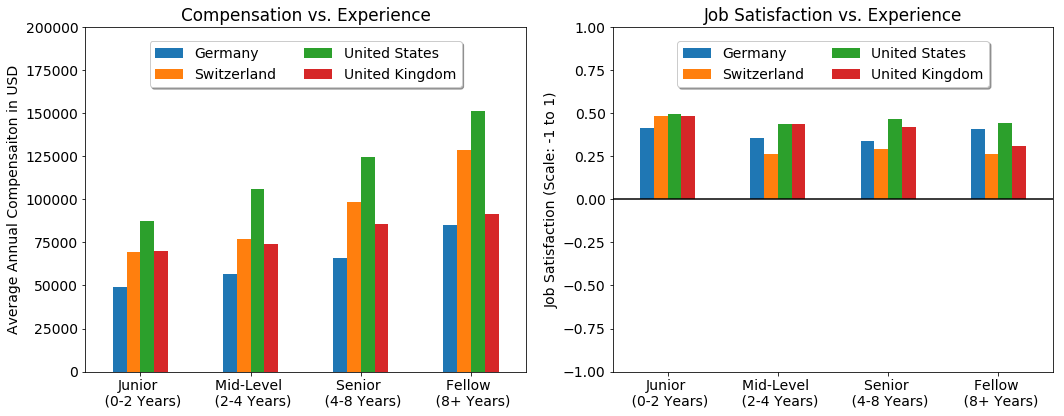

In [1010]:
f, axes = plt.subplots(1, 2, figsize=(15, 6))

chart1 = df_comp.plot(kind='bar', ax = axes[0])
chart1.set_xticklabels(level_list, rotation=0);
chart1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98),
          ncol=2, shadow=True, fancybox=True);
chart1.set_ylim(0, 200000);
chart1.set_ylabel('Average Annual Compensaiton in USD')
chart1.set_title('Compensation vs. Experience');

chart2 = df_sat.plot(kind = 'bar', ax = axes[1])
chart2.set_xticklabels(level_list, rotation=0);
chart2.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98),
          ncol=2, shadow=True, fancybox=True)
chart2.set(ylim = ((-1,1.0)));
chart2.axhline(0, color = 'black')
chart2.set_ylabel('Job Satisfaction (Scale: -1 to 1)')
chart2.set_title('Job Satisfaction vs. Experience');

plt.tight_layout()
#plt.savefig('plot/q3_2.png', bbox_inches='tight')

## 5. Conclusion

- Career in Switzerland:
    - **1. Language**: Is Python a good language to start with as a developer? Answer in terms of Employment, Job Satisfaction, Career Satisfaction and Salary. How does it compare to other popular languages (Javascript, HTML/CSS, SQL, Java)?
    
    **Answer:** In Switzerland, the employment rate of a developer with extensive Python experience is **92%**. Out of the employed developers, **76%** percent are employed full-time and **17%** are employed part-time. We see that the average Job Satisfaction is **0.365**, roughly corresponding to "Slightly satisfied". The average Career Satisfaction is **0.527**, corresponding to "Slightly satisfied". **11%** of the respondants are unsatisfied with their career and **18%** are unsatiesfied with their jobs. Job and career satisfactions are similar compared to developers with experience in other popular languages, so are the employment percentages. Developers with Python experience are  the highest paid group, with average annual compensation of **100K** USD.
    
    - **2. Growth**: How do Career Satisfaction and Salary grow with experience? Python vs. General?
    
    **Answer:** According to the linear models, the starting salary of a software developer in general is around **59000CHF** and grows **4860CHF** with each years of experience. The starting compensation of a developer with Python experience is around **63000CHF** and grows **5110CHF** with each years of experience.
    
- Career in Switzerland vs. in Germany, UK, US: 
    - **3. Country**: How do Job Satisfaction and Salary of python developers in Switzerland compare to those in Germany, UK, US?
    
    **Answer:** We see that Job Satisfaction is lowest in Switzerland comparing to other countries except for junior developers. The average compensation in Switzerland is the 2nd highest among the popular countries.